In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train_data=pd.read_csv('train_knn.txt',sep=',', header=None)
train_data=train_data.values
train_data

array([[7, 7, 1],
       [7, 4, 1],
       [6, 4, 1],
       [7, 5, 1],
       [7, 6, 1],
       [6, 7, 1],
       [6, 6, 1],
       [3, 4, 2],
       [2, 3, 2],
       [3, 2, 2],
       [4, 3, 2],
       [3, 3, 2],
       [4, 4, 2],
       [1, 4, 2]])

In [6]:
test_data=pd.read_csv('test_knn.txt',sep=',', header=None)
test_data=test_data.values
test_data

array([[3, 7],
       [7, 7],
       [4, 3],
       [2, 8],
       [3, 5],
       [1, 2],
       [4, 8],
       [8, 3],
       [8, 4]])

Text(0, 0.5, 'X2')

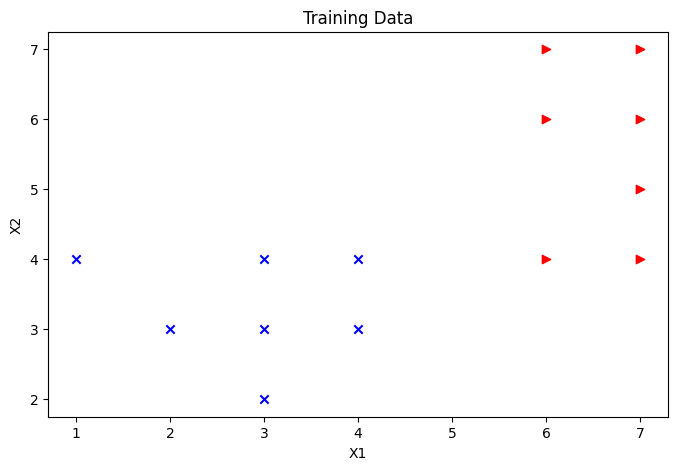

In [7]:
plt.figure(figsize=(8, 5))

#plt.subplot(1, 2, 1)
for point in train_data:
    if point[2] == 1:
        plt.scatter(point[0], point[1], c='red', marker='>')
    else:
        plt.scatter(point[0], point[1], c='blue', marker='x')
plt.title("Training Data")
plt.xlabel('X1')
plt.ylabel('X2')

In [8]:
#k = int(input("Enter the value of K: "))

Enter the value of K: 5
printed to prediction


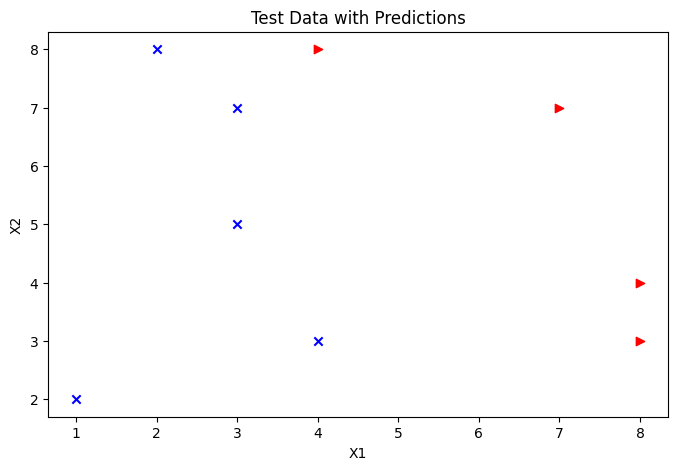

In [13]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn(train_data, test_point, k):
    distances = []
    for point in train_data:
        distance = euclidean_distance(point[:2], test_point)
        distances.append((distance, point[2]))
    distances.sort(key=lambda x: x[0])
    return distances[:k]

def predict_class(knn_result):
    class_counts = {}
    for _, class_label in knn_result:
        if class_label in class_counts:
            class_counts[class_label] += 1
        else:
            class_counts[class_label] = 1
    return max(class_counts, key=class_counts.get)


def main():
    # Get the value of K from the user
    k = int(input("Enter the value of K: "))

    with open('prediction.txt', 'w') as f:
        for test_point in test_data:
            knn_result = knn(train_data, test_point[:2], k)
            predicted_class = predict_class(knn_result)

            f.write(f'Test point: {test_point[0]}, {test_point[1]}\n')
            for i, (distance, class_label) in enumerate(knn_result):
                f.write(f'Distance {i+1}: {distance:.2f} Class: {class_label}\n')
            f.write(f'Predicted class: {predicted_class}\n\n')

    print("printed to prediction")

    # Plot the test data with predictions
    plt.figure(figsize=(8, 5))
    for test_point in test_data:
        knn_result = knn(train_data, test_point[:2], k)
        predicted_class = predict_class(knn_result)

        if predicted_class == 1:
            plt.scatter(test_point[0], test_point[1], c='red', marker='>')
        else:
            plt.scatter(test_point[0], test_point[1], c='blue', marker='x')

    plt.title("Test Data with Predictions")

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

if __name__ == "__main__":
    main()